In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [207]:
df=pd.read_csv('customer_segmentation_data.csv')

In [208]:
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [209]:
df.drop(columns=['Segmentation Group','Customer ID'],axis=1,inplace=True)
df.head()

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language
0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English
1,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French
2,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German
3,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French
4,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English


In [210]:
df.shape

(53503, 18)

In [211]:
# Univariate Analysis

In [212]:
df.describe()

,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000
mean,44.140945,82768.324318,492580.789638,3023.702447
std,15.079486,36651.075670,268405.505571,1285.834295
min,18.000000,20001.000000,50001.000000,500.000000
25%,32.000000,51568.500000,249613.500000,1817.000000
50%,43.000000,80719.000000,477261.000000,3194.000000
75%,57.000000,115973.500000,739124.000000,4311.500000
max,70.000000,149999.000000,1000000.000000,5000.000000


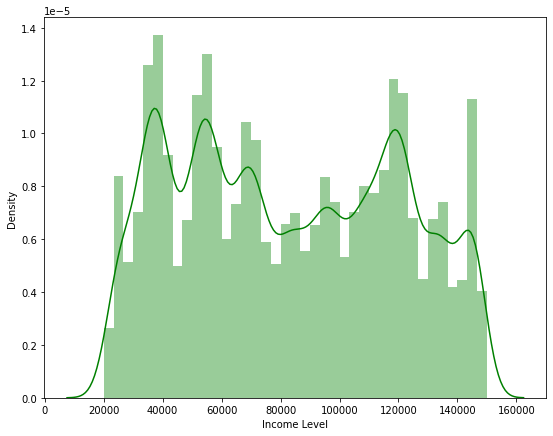

In [213]:
plt.figure(figsize=(9,7))
sns.distplot(df['Income Level'],color='green')
plt.show()

In [214]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language'],
      dtype='object')

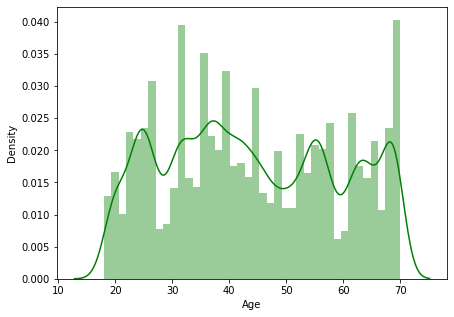

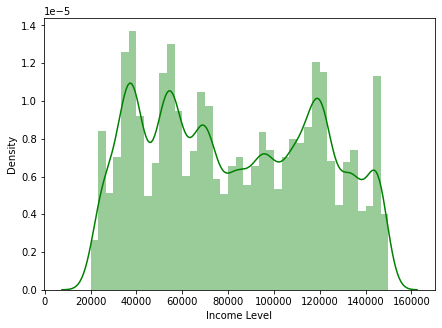

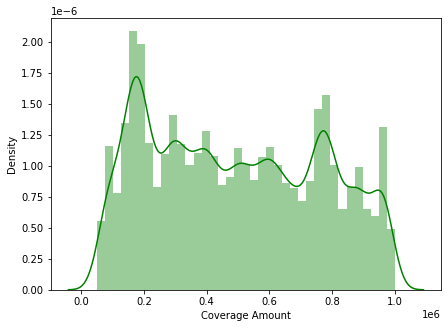

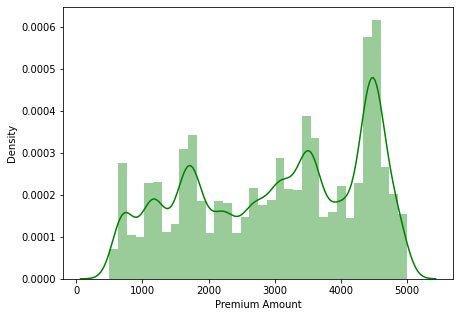

In [215]:
columns=['Age','Income Level','Coverage Amount','Premium Amount']
for i in columns:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i],color='green')
    plt.show()

<Figure size 504x360 with 0 Axes>

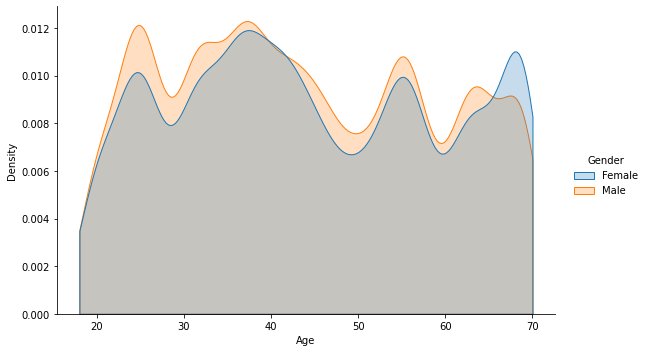

<Figure size 504x360 with 0 Axes>

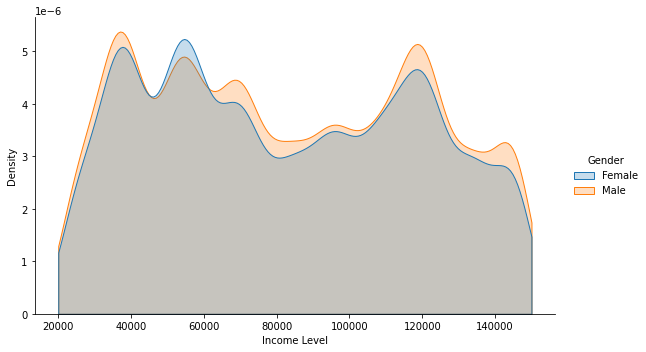

<Figure size 504x360 with 0 Axes>

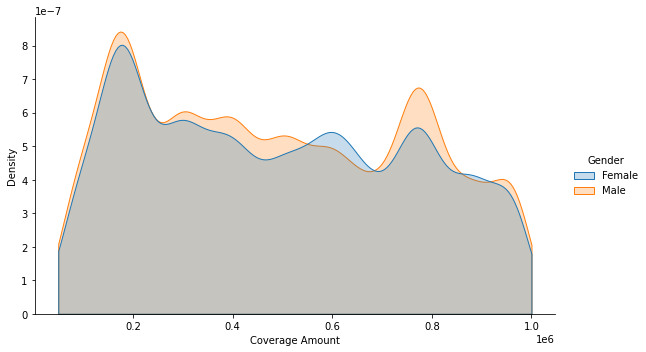

<Figure size 504x360 with 0 Axes>

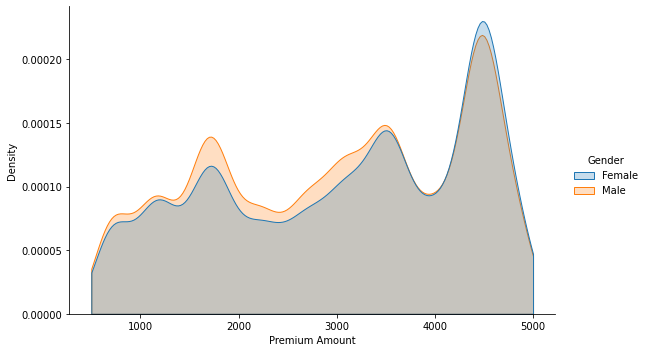

In [216]:
for i in columns:
    plt.figure(figsize=(7,5))
    sns.displot(data=df,hue='Gender',x=i,kind='kde',fill=True,height=5,aspect=1.6,cut=0,bw_adjust=1)
    plt.show()

<Figure size 504x360 with 0 Axes>

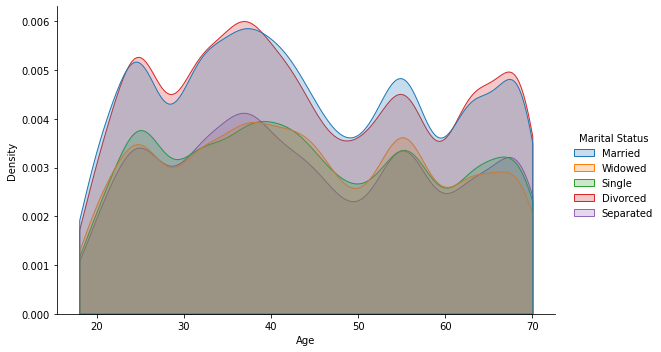

<Figure size 504x360 with 0 Axes>

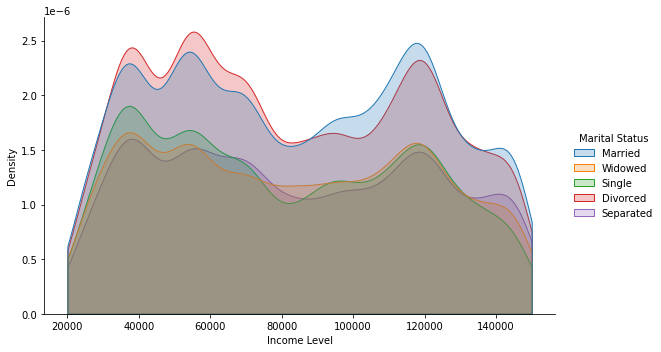

<Figure size 504x360 with 0 Axes>

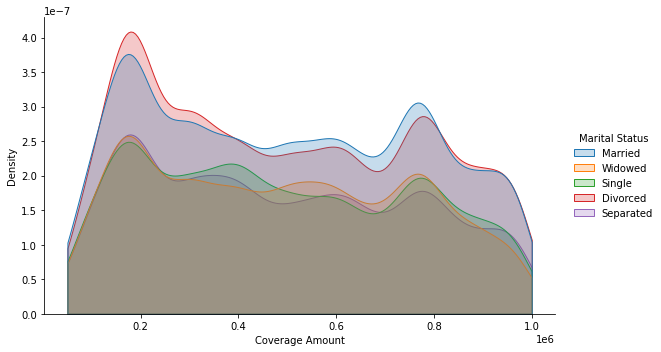

<Figure size 504x360 with 0 Axes>

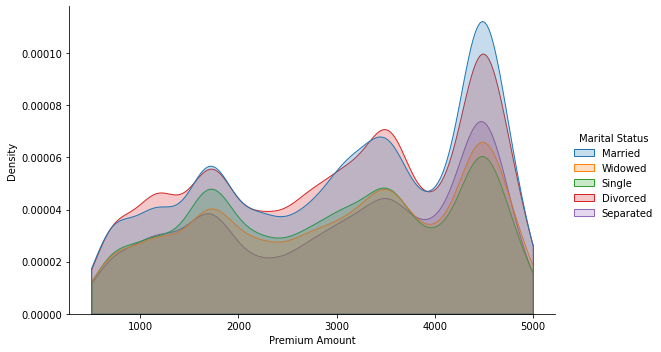

In [217]:
for i in columns:
    plt.figure(figsize=(7,5))
    sns.displot(data=df,hue='Marital Status',x=i,kind='kde',fill=True,height=5,aspect=1.6,cut=0,bw_adjust=1)
    plt.show()

<Figure size 504x360 with 0 Axes>

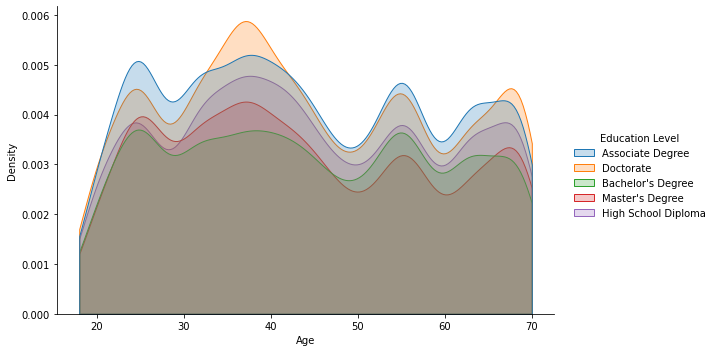

<Figure size 504x360 with 0 Axes>

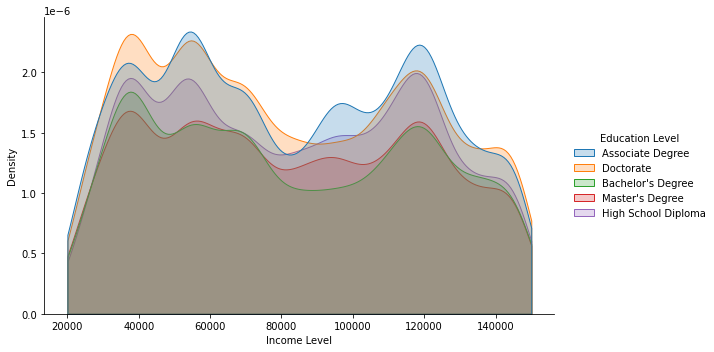

<Figure size 504x360 with 0 Axes>

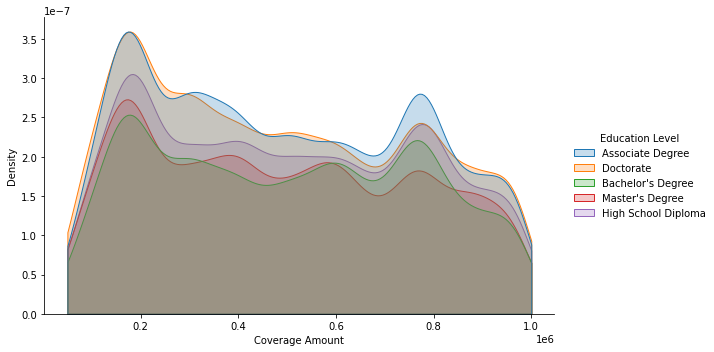

<Figure size 504x360 with 0 Axes>

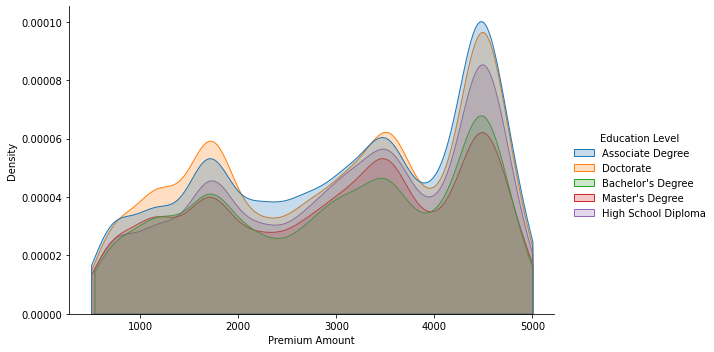

In [218]:
for i in columns:
    plt.figure(figsize=(7,5))
    sns.displot(data=df,hue='Education Level',kind='kde',x=i,height=5,fill=True,aspect=1.6,cut=0,bw_adjust=1)
    plt.show()

<Figure size 504x360 with 0 Axes>

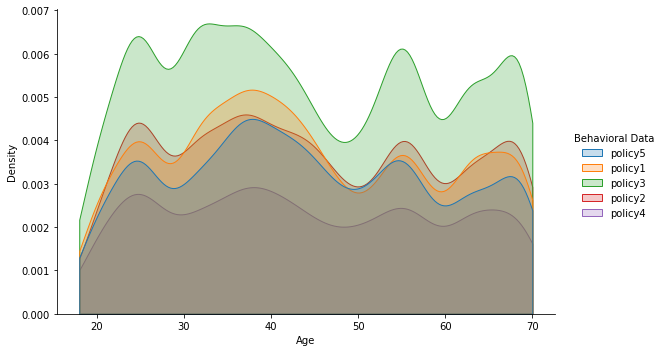

<Figure size 504x360 with 0 Axes>

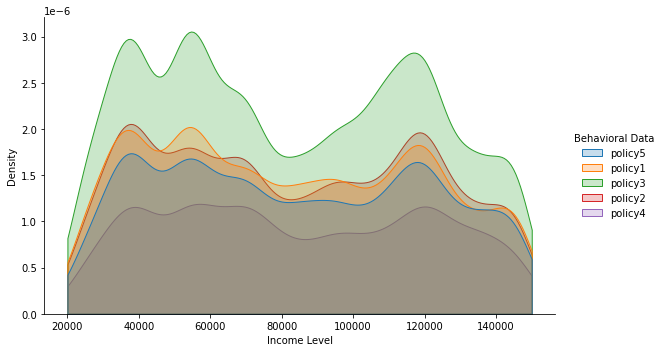

<Figure size 504x360 with 0 Axes>

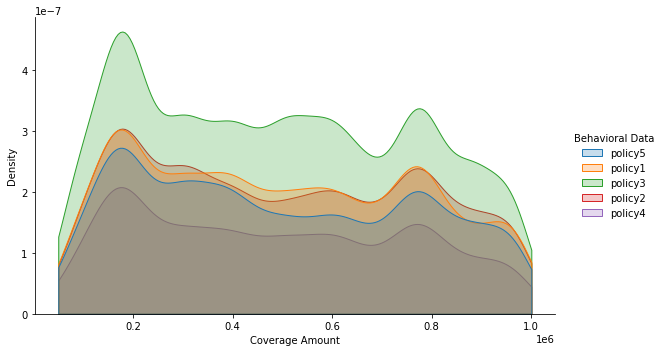

<Figure size 504x360 with 0 Axes>

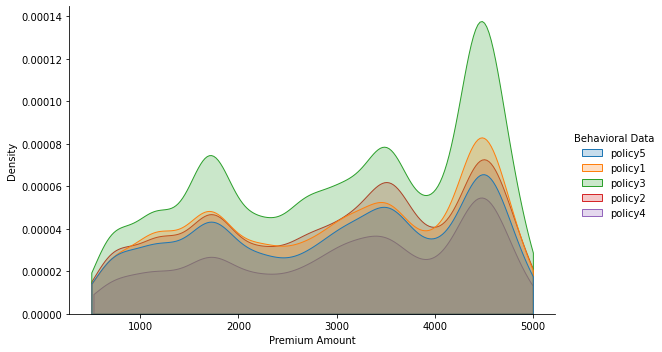

In [219]:
for i in columns:
    plt.figure(figsize=(7,5))
    sns.displot(data=df,hue='Behavioral Data',x=i,kind='kde',fill=True,height=5,aspect=1.6,cut=0,bw_adjust=1)
    plt.show()

<Figure size 504x360 with 0 Axes>

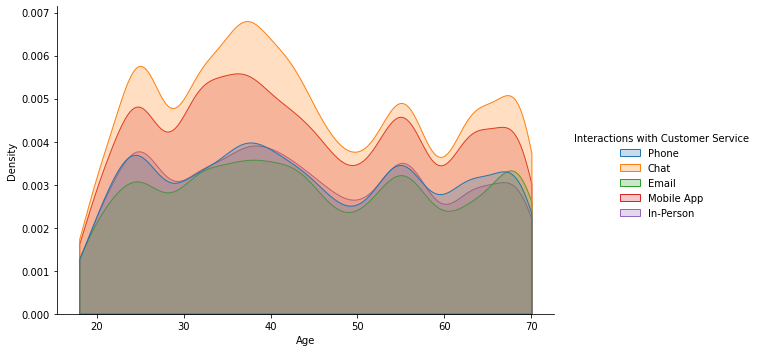

<Figure size 504x360 with 0 Axes>

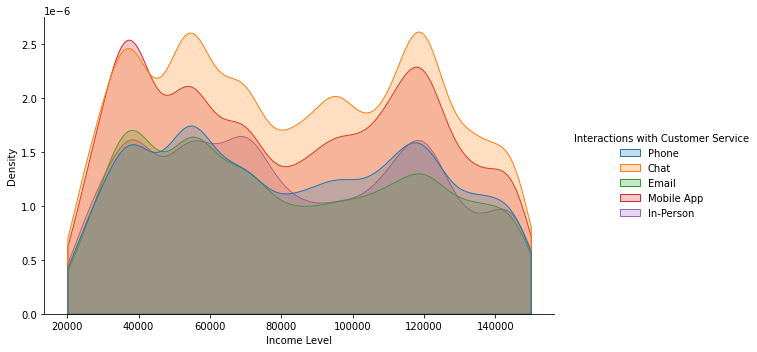

<Figure size 504x360 with 0 Axes>

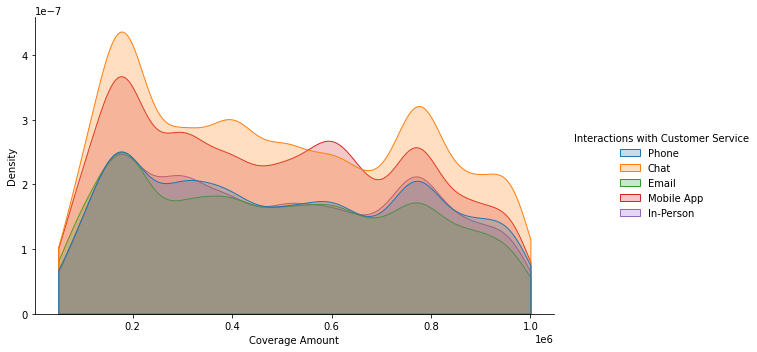

<Figure size 504x360 with 0 Axes>

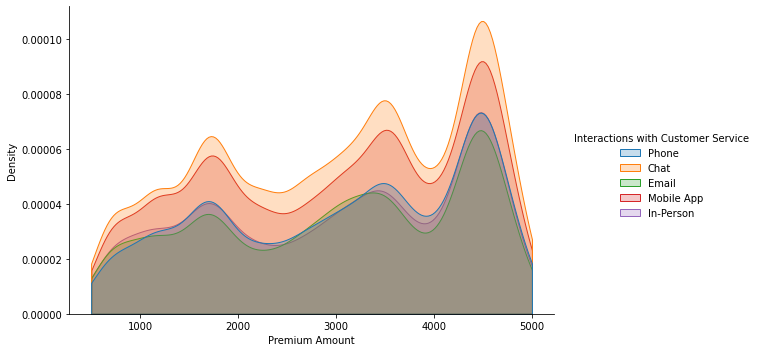

In [220]:
for i in columns:
    plt.figure(figsize=(7,5))
    sns.displot(data=df,hue='Interactions with Customer Service',x=i,kind='kde',fill=True,height=5,aspect=1.6,cut=0,bw_adjust=1)
    plt.show()

<Figure size 504x360 with 0 Axes>

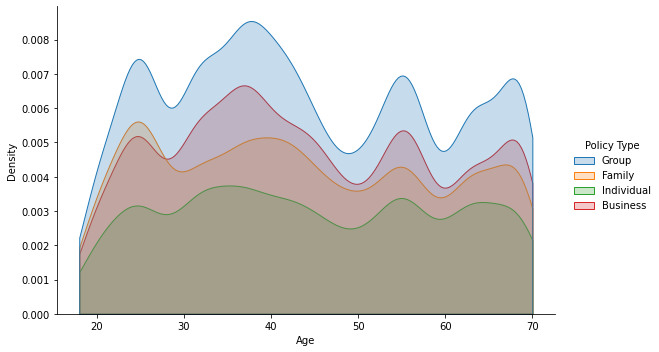

<Figure size 504x360 with 0 Axes>

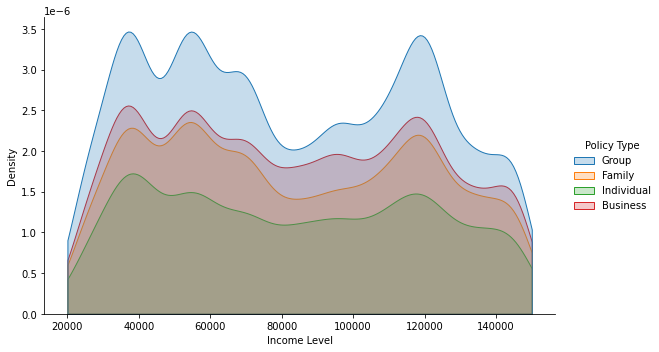

<Figure size 504x360 with 0 Axes>

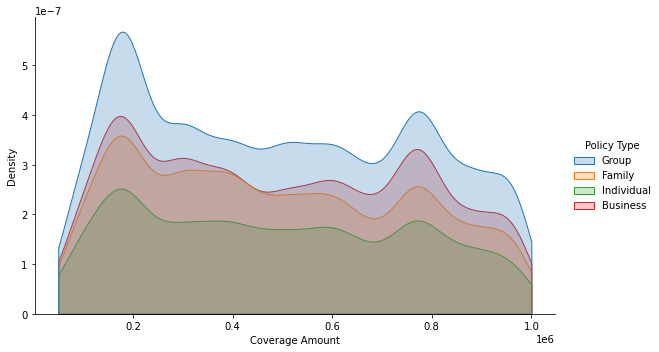

<Figure size 504x360 with 0 Axes>

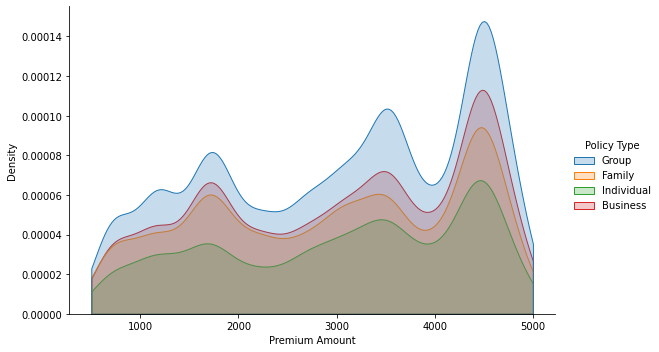

In [221]:
for i in columns:
    plt.figure(figsize=(7,5))
    sns.displot(data=df,hue='Policy Type',x=i,kind='kde',fill=True,height=5,aspect=1.6,cut=0,bw_adjust=1)
    plt.show()

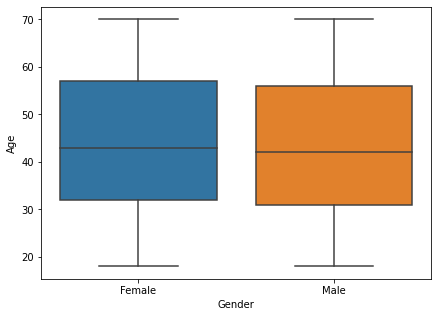

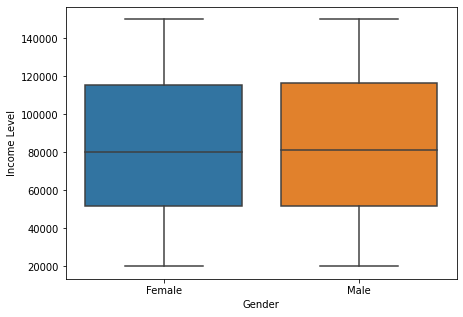

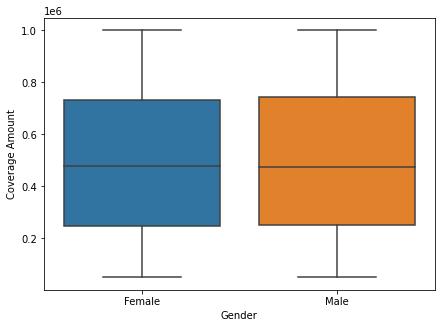

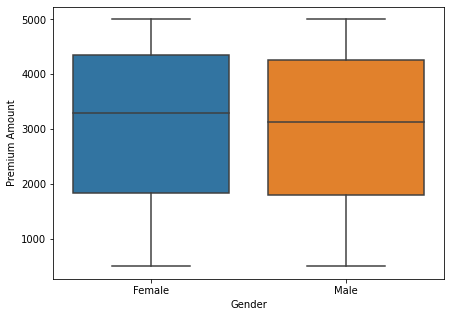

In [222]:
for i in columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df,x='Gender',y=i)
    plt.show()

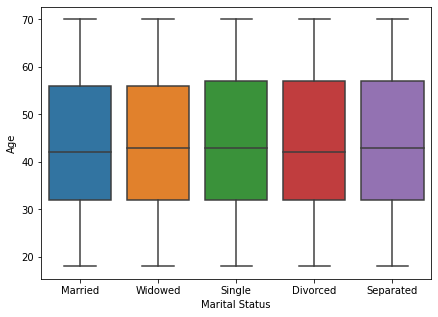

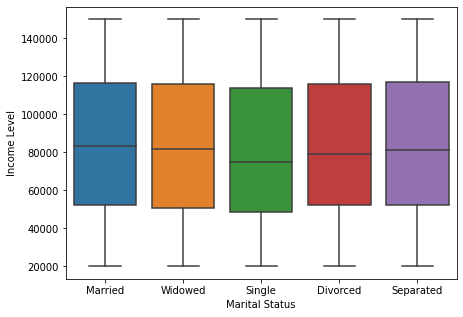

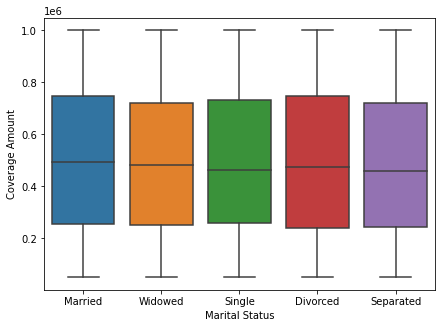

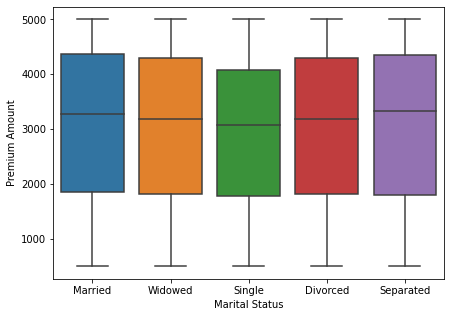

In [223]:
for i in columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df,x='Marital Status',y=i)
    plt.show()

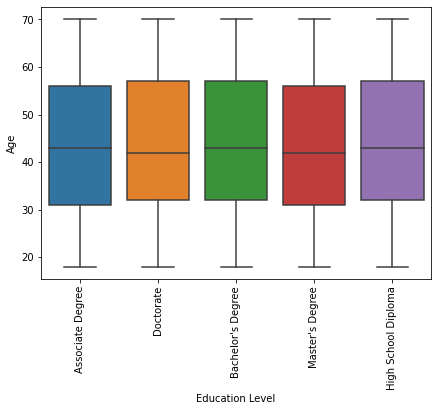

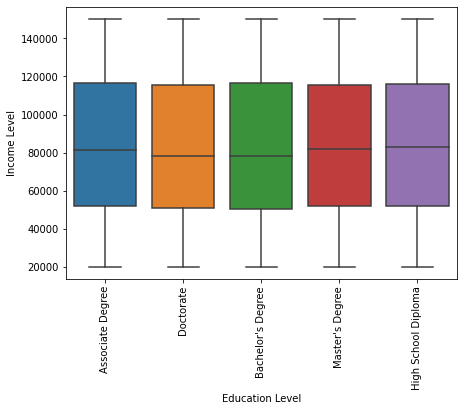

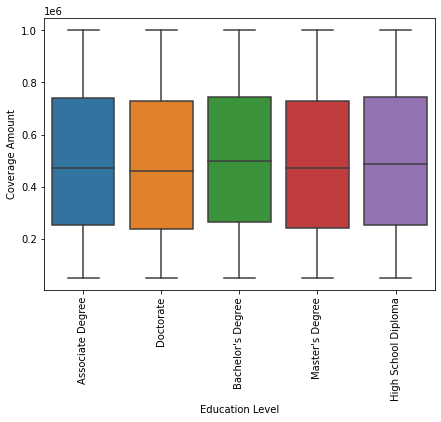

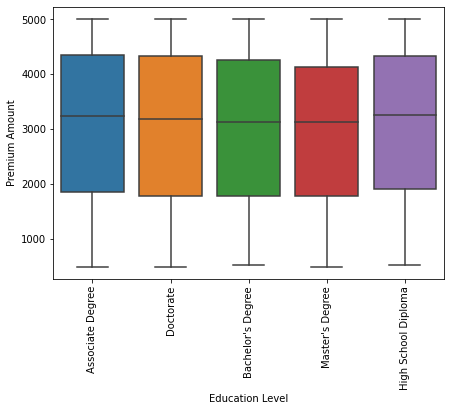

In [224]:
for i in columns:
    plt.figure(figsize=(7,5))
    plt.xticks(rotation=90)
    sns.boxplot(data=df,x='Education Level',y=i)
    plt.show()

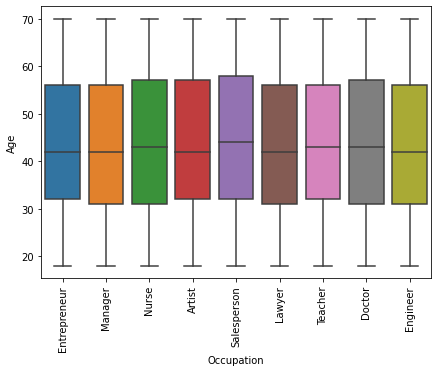

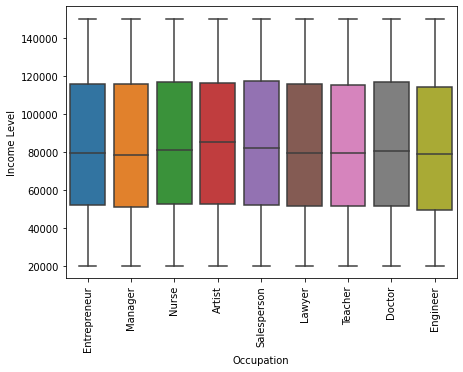

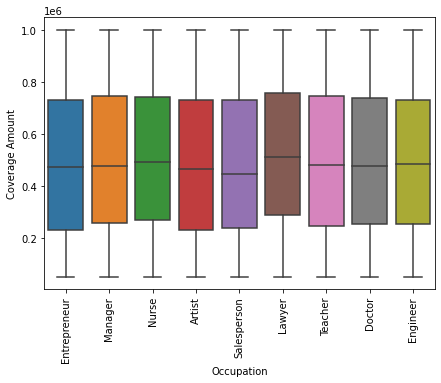

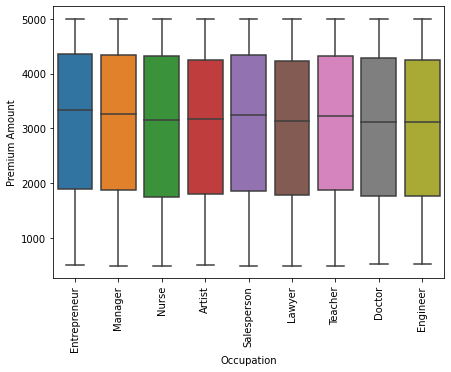

In [225]:
for i in columns:
    plt.figure(figsize=(7,5))
    plt.xticks(rotation=90)
    sns.boxplot(data=df,x='Occupation',y=i)
    plt.show()

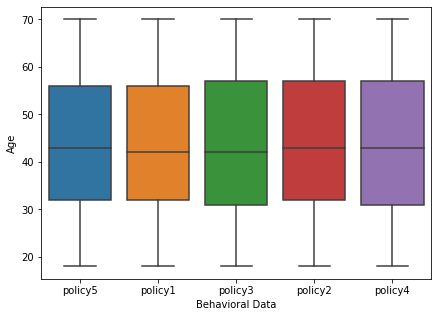

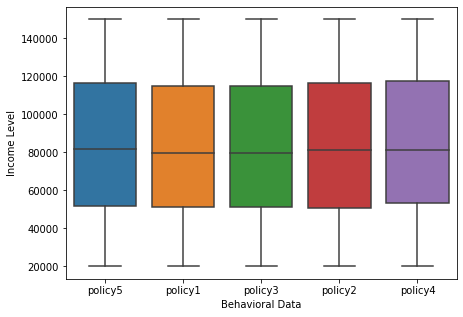

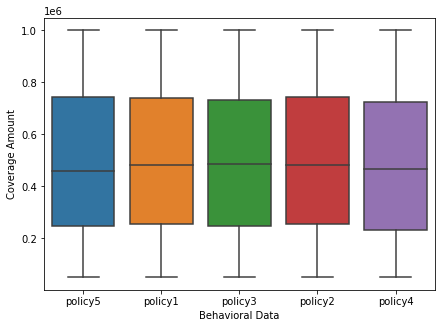

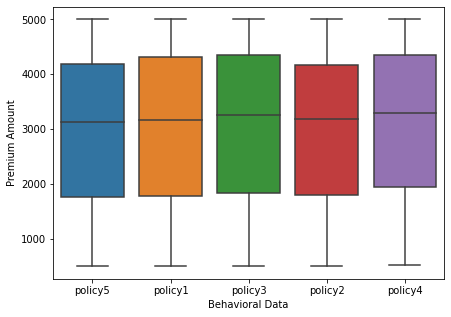

In [226]:
for i in columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df,x='Behavioral Data',y=i)
    plt.show()

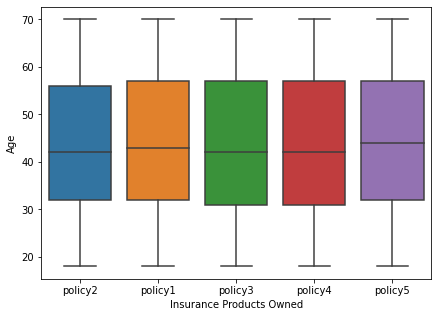

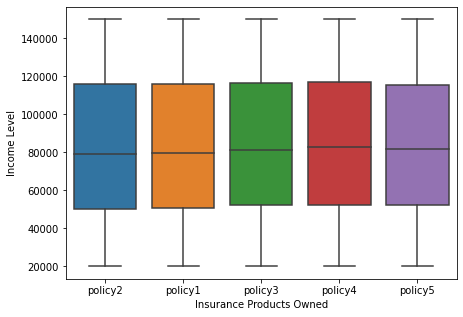

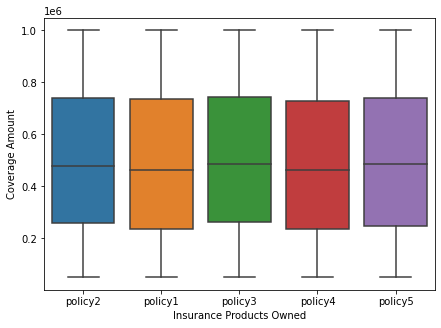

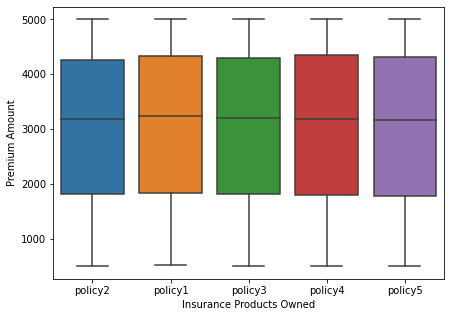

In [227]:
for i in columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df,x='Insurance Products Owned',y=i)
    plt.show()

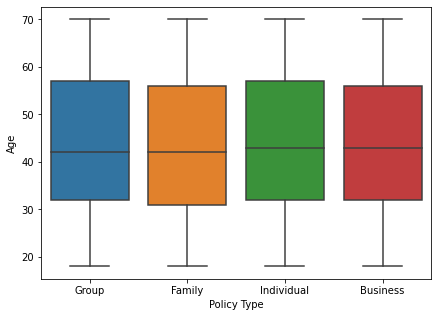

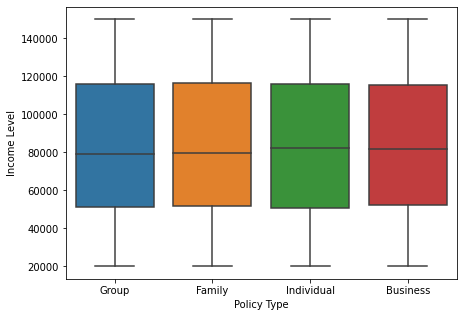

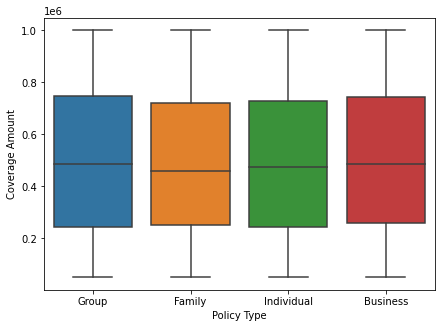

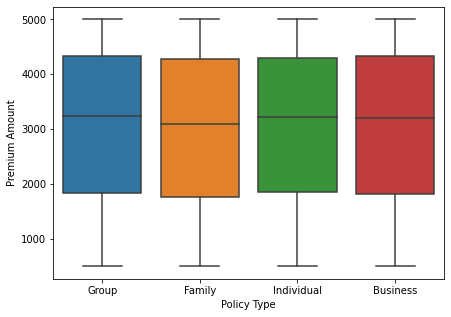

In [228]:
for i in columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df,x='Policy Type',y=i)
    plt.show()

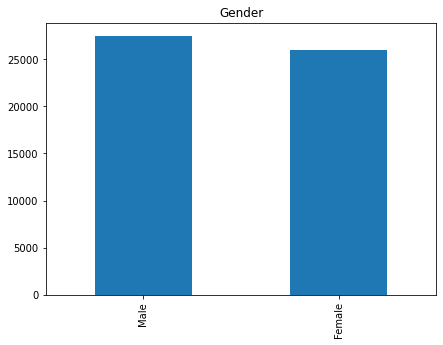

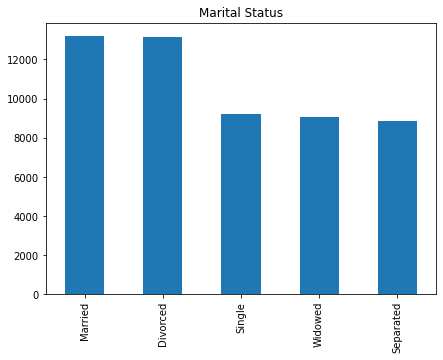

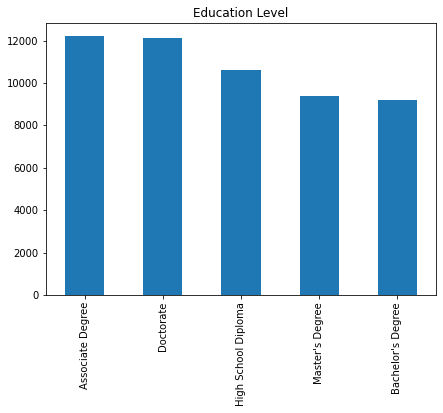

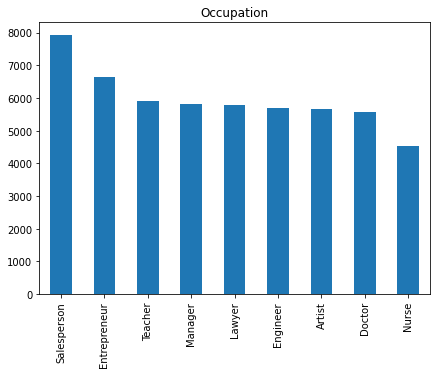

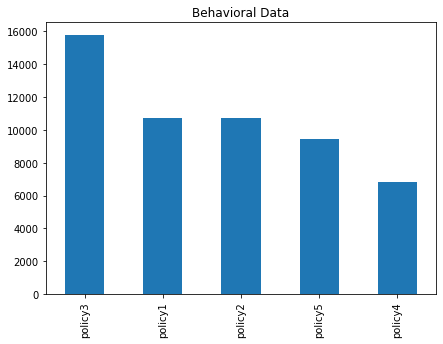

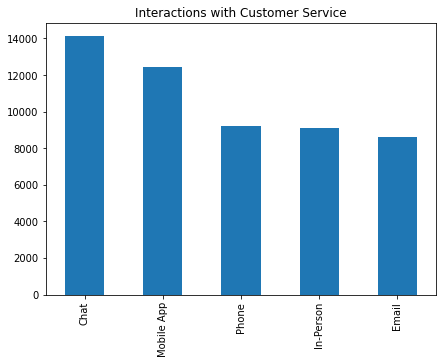

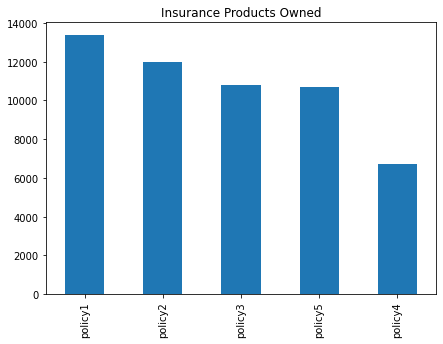

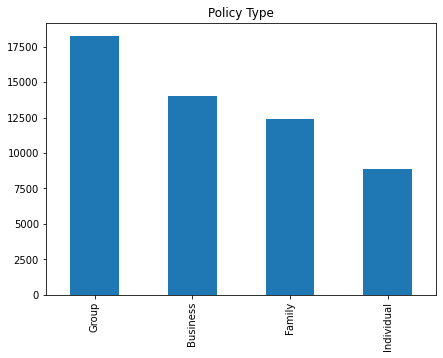

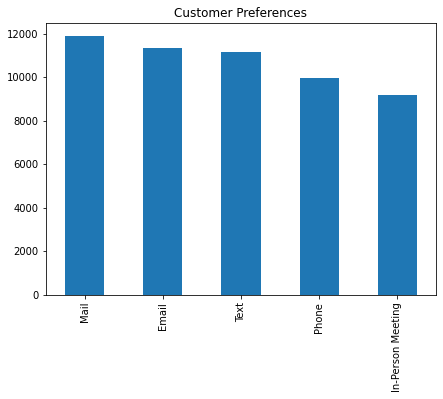

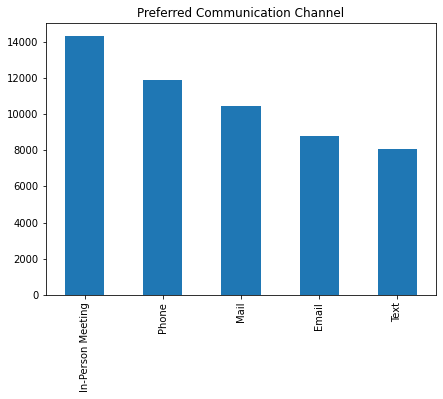

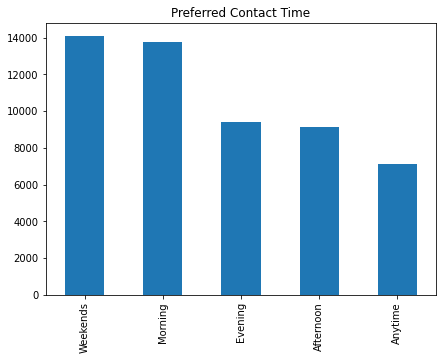

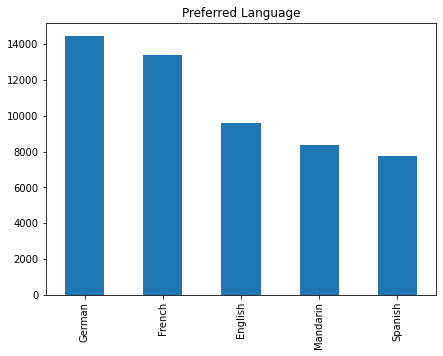

In [229]:
columns2=['Gender','Marital Status','Education Level','Occupation','Behavioral Data','Interactions with Customer Service',
         'Insurance Products Owned','Policy Type','Customer Preferences','Preferred Communication Channel',
         'Preferred Contact Time','Preferred Language']
for i in columns2:
    plt.figure(figsize=(7,5))
    plt.title(i)
    df[i].value_counts().plot(kind='bar')
    plt.show()

In [230]:
df.groupby('Gender').mean()

,Age,Income Level,Coverage Amount,Premium Amount
Gender,,,,
Female,44.575873,82396.768728,491964.821950,3063.456391
Male,43.729663,83119.680061,493163.269864,2986.109749


In [231]:
df.groupby('Marital Status').mean()

,Age,Income Level,Coverage Amount,Premium Amount
Marital Status,,,,
Divorced,44.181583,82495.211999,494298.620789,3018.914683
Married,44.076254,84049.737348,500663.874272,3072.995991
Separated,44.320054,83833.705112,486240.408419,3062.941316
Single,44.189560,80344.794454,489283.690266,2931.244481
Widowed,43.952187,82712.878594,487849.871213,3014.206786


In [232]:
df.groupby('Education Level').mean()

,Age,Income Level,Coverage Amount,Premium Amount
Education Level,,,,
Associate Degree,44.061656,83001.642758,491626.947842,3061.066405
Bachelor's Degree,44.324072,82384.537552,501995.203603,2983.889624
Doctorate,44.250269,82084.350161,484587.316533,3012.322730
High School Diploma,44.328274,83504.584520,498292.273876,3078.332799
Master's Degree,43.710762,82891.676917,488424.068653,2966.983878


In [233]:
df.groupby('Occupation').mean()

,Age,Income Level,Coverage Amount,Premium Amount
Occupation,,,,
Artist,44.232263,84224.489764,483731.353865,3001.815743
Doctor,44.207249,82862.251929,492107.549973,2968.318859
Engineer,43.739656,81515.959677,489530.665498,2962.559607
Entrepreneur,44.273960,82519.286016,484685.755726,3096.584539
Lawyer,43.860087,82671.421645,515788.409351,2977.103377
Manager,43.552301,81889.955368,496837.735826,3065.029123
Nurse,44.218315,83731.283123,498239.621765,2986.079850
Salesperson,44.852254,83378.892537,482677.318348,3061.938376
Teacher,44.068913,82174.043176,495405.470877,3056.612767


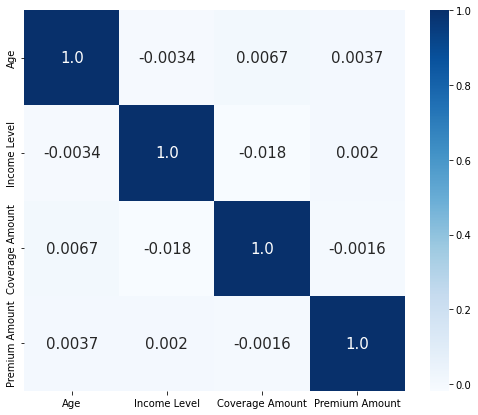

In [234]:
corr_matrix=df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix,annot=True,square=True,cbar=True,fmt='.2',annot_kws={'size':15},cmap='Blues')
plt.show()

In [235]:
cols_to_scale=['Coverage Amount','Premium Amount']
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [236]:
# Clustering - Univariate, Bivariate, Multivariate

In [237]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10)
    kmeans.fit(df[['Coverage Amount','Premium Amount']])
    inertia_scores.append(kmeans.inertia_)

In [238]:
inertia_scores

[8639.099280663719,
 5276.7103104443795,
 3154.7620945866192,
 2022.9734914307735,
 1677.802768744665,
 1408.0281188037343,
 1194.6858626825447,
 1005.4967160128385,
 863.6431820455618,
 792.2144456799874]

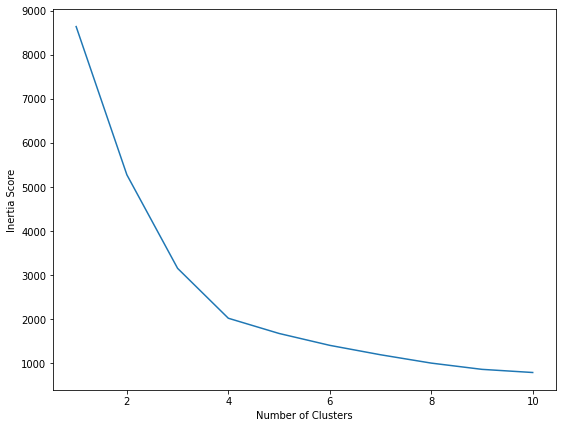

In [239]:
plt.figure(figsize=(9,7))
plt.plot(range(1,11),inertia_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.show()

In [240]:
kmeans=KMeans(n_clusters=4,init='k-means++',n_init=10)
predicted=kmeans.fit_predict(df[['Coverage Amount','Premium Amount']])

In [241]:
predicted

array([3, 0, 2, ..., 2, 2, 2])

In [242]:
df['Clusters']=predicted

In [243]:
df.sample(5)

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Clusters
40902,21,Female,Single,Master's Degree,West Bengal,Entrepreneur,33018,policy5,12-02-2020,Email,policy1,0.028376,0.474444,Business,Phone,In-Person Meeting,Morning,Spanish,3
38038,25,Female,Single,Master's Degree,Goa,Engineer,38295,policy1,5/22/2020,Chat,policy1,0.950157,0.382889,Group,Phone,Text,Afternoon,Spanish,0
50765,29,Male,Separated,Master's Degree,Arunachal Pradesh,Entrepreneur,29978,policy5,8/19/2018,Mobile App,policy2,0.509017,0.896889,Business,In-Person Meeting,Email,Morning,English,2
24304,40,Female,Separated,Master's Degree,Lakshadweep,Lawyer,145349,policy1,12-11-2020,Chat,policy4,0.651736,0.302667,Group,Mail,Email,Evening,Mandarin,0
17333,52,Male,Separated,Bachelor's Degree,Arunachal Pradesh,Entrepreneur,133414,policy3,9/23/2023,In-Person,policy2,0.465745,0.116000,Group,Text,In-Person Meeting,Afternoon,English,3


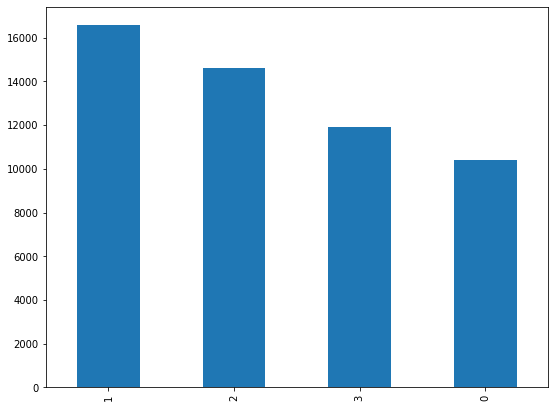

In [244]:
plt.figure(figsize=(9,7))
df['Clusters'].value_counts().plot(kind='bar')
plt.show()

In [247]:
df1=df[df['Clusters']==0]
df2=df[df['Clusters']==1]
df3=df[df['Clusters']==2]
df4=df[df['Clusters']==3]

In [259]:
centroids=pd.DataFrame(kmeans.cluster_centers_,columns=['x','y'])
centroids

,x,y
0,0.735529,0.264313
1,0.231963,0.768291
2,0.724261,0.778489
3,0.238732,0.265227


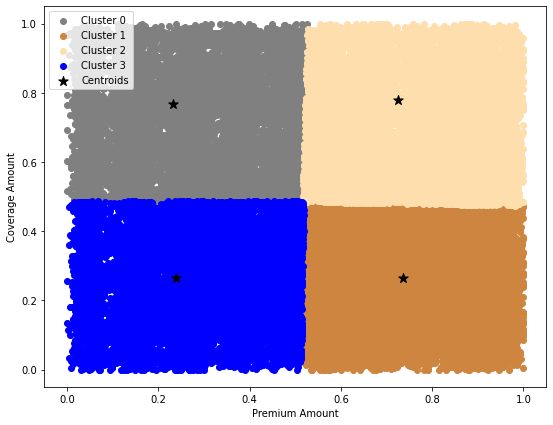

In [263]:
plt.figure(figsize=(9,7))
plt.scatter(df1['Premium Amount'],df1['Coverage Amount'],c='gray',label='Cluster 0')
plt.scatter(df2['Premium Amount'],df2['Coverage Amount'],c='peru',label='Cluster 1')
plt.scatter(df3['Premium Amount'],df3['Coverage Amount'],c='navajowhite',label='Cluster 2')
plt.scatter(df4['Premium Amount'],df4['Coverage Amount'],c='blue',label='Cluster 3')
plt.xlabel('Premium Amount')
plt.ylabel('Coverage Amount')
plt.scatter(centroids['x'],centroids['y'],s=100,c='black',marker='*',label='Centroids')
plt.legend()
plt.show()

In [264]:
pd.crosstab(df['Clusters'],df['Gender'],normalize='index')

Gender,Female,Male
Clusters,,
0,0.471448,0.528552
1,0.493816,0.506184
2,0.501404,0.498596
3,0.469109,0.530891


In [265]:
pd.crosstab(df['Clusters'],df['Marital Status'],normalize='index')

Marital Status,Divorced,Married,Separated,Single,Widowed
Clusters,,,,,
0,0.241973,0.242550,0.154778,0.184388,0.176312
1,0.240965,0.247240,0.173273,0.169472,0.169050
2,0.249024,0.264027,0.167569,0.153593,0.165787
3,0.251907,0.230028,0.162042,0.186604,0.169419


In [266]:
pd.crosstab(df['Clusters'],df['Education Level'],normalize='index')

Education Level,Associate Degree,Bachelor's Degree,Doctorate,High School Diploma,Master's Degree
Clusters,,,,,
0,0.226110,0.183138,0.224572,0.188714,0.177466
1,0.235415,0.161086,0.231433,0.199578,0.172489
2,0.224704,0.179146,0.214085,0.211071,0.170994
3,0.224579,0.169671,0.235225,0.189035,0.181490


In [267]:
pd.crosstab(df['Clusters'],df['Occupation'],normalize='index')

Occupation,Artist,Doctor,Engineer,Entrepreneur,Lawyer,Manager,Nurse,Salesperson,Teacher
Clusters,,,,,,,,,
0,0.107479,0.108441,0.114978,0.119592,0.116035,0.102673,0.087002,0.136608,0.107191
1,0.107873,0.100573,0.105339,0.129291,0.096591,0.110890,0.079638,0.158250,0.111554
2,0.100158,0.101391,0.101665,0.126327,0.116462,0.112215,0.086867,0.141741,0.113174
3,0.108810,0.108810,0.107134,0.117780,0.106212,0.105541,0.086177,0.151396,0.108140


In [268]:
pd.crosstab(df['Clusters'],df['Behavioral Data'],normalize='index')

Behavioral Data,policy1,policy2,policy3,policy4,policy5
Clusters,,,,,
0,0.205826,0.206403,0.291771,0.114113,0.181888
1,0.197164,0.193183,0.291523,0.138100,0.180030
2,0.199973,0.203192,0.301911,0.130780,0.164143
3,0.202867,0.202364,0.292313,0.119876,0.182580


In [269]:
pd.crosstab(df['Clusters'],df['Interactions with Customer Service'],normalize='index')

Interactions with Customer Service,Chat,Email,In-Person,Mobile App,Phone
Clusters,,,,,
0,0.266968,0.153336,0.173524,0.235532,0.170640
1,0.265279,0.161629,0.168024,0.233544,0.171523
2,0.259642,0.161609,0.173871,0.224498,0.180380
3,0.267332,0.165898,0.166904,0.236483,0.163383


In [270]:
pd.crosstab(df['Clusters'],df['Insurance Products Owned'],normalize='index')

Insurance Products Owned,policy1,policy2,policy3,policy4,policy5
Clusters,,,,,
0,0.236108,0.227168,0.211402,0.123149,0.202173
1,0.255204,0.218884,0.201388,0.128688,0.195837
2,0.247106,0.223676,0.200178,0.124204,0.204837
3,0.257524,0.227010,0.194652,0.125576,0.195238


In [271]:
pd.crosstab(df['Clusters'],df['Policy Type'],normalize='index')

Policy Type,Business,Family,Group,Individual
Clusters,,,,
0,0.261584,0.231109,0.347433,0.159873
1,0.255928,0.230468,0.342323,0.171282
2,0.269028,0.216551,0.348496,0.165925
3,0.259536,0.254757,0.325258,0.160449


In [272]:
pd.crosstab(df['Clusters'],df['Customer Preferences'],normalize='index')

Customer Preferences,Email,In-Person Meeting,Mail,Phone,Text
Clusters,,,,,
0,0.207268,0.166314,0.234570,0.198423,0.193424
1,0.218401,0.175626,0.208507,0.182021,0.215445
2,0.210043,0.171063,0.229362,0.184695,0.204837
3,0.207561,0.171934,0.221561,0.182916,0.216028


In [273]:
pd.crosstab(df['Clusters'],df['Preferred Communication Channel'],normalize='index')

Preferred Communication Channel,Email,In-Person Meeting,Mail,Phone,Text
Clusters,,,,,
0,0.182465,0.264757,0.194001,0.222169,0.136608
1,0.153605,0.266727,0.194449,0.223710,0.161508
2,0.164417,0.278139,0.189971,0.223197,0.144276
3,0.164222,0.257859,0.202448,0.217537,0.157934


In [274]:
pd.crosstab(df['Clusters'],df['Preferred Contact Time'],normalize='index')

Preferred Contact Time,Afternoon,Anytime,Evening,Morning,Weekends
Clusters,,,,,
0,0.171890,0.133051,0.168333,0.259662,0.267064
1,0.170920,0.131222,0.183650,0.250618,0.263590
2,0.176338,0.138179,0.165376,0.266767,0.253340
3,0.162629,0.127756,0.184341,0.253081,0.272194


In [275]:
pd.crosstab(df['Clusters'],df['Preferred Language'],normalize='index')

Preferred Language,English,French,German,Mandarin,Spanish
Clusters,,,,,
0,0.185734,0.267737,0.256681,0.151413,0.138435
1,0.171403,0.238371,0.279276,0.160060,0.150890
2,0.181270,0.259231,0.261218,0.163595,0.134685
3,0.181742,0.238243,0.279990,0.146031,0.153994
